<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/hard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocessing**

In [ ]:
import numpy as np 
import pandas as pd
from keras.datasets import mnist
import tensorflow as tf 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from keras import metrics
from sklearn.datasets import load_iris

**[Problem 1]** Sharing and executing the official tutorial model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

predictions = model(x_train[:1]).numpy()
print("prediction:", predictions)
pred = tf.nn.softmax(predictions).numpy()
print(pred)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss_fn(y_train[:1], predictions).numpy())

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

11490434/11490434 [==============================] - 1s 0us/step
prediction: [[-0.9745819   0.2624257  -0.13478854 -0.24092844 -0.44170505 -0.24727029
   0.25116864 -0.7041353  -0.7191683   0.08230695]]
[[0.04650543 0.16022463 0.1077014  0.09685574 0.07923721 0.09624343
  0.15843108 0.06094768 0.06003831 0.13381498]]
2.3408747
Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2992 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1443 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1081 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0900 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0772 - accuracy: 0.9766
313/313 - 0s - loss: 0.0767 - accuracy: 0.9762 - 490ms/epoch - 2ms/step


[0.07670243084430695, 0.9761999845504761]

**[Problem 3]** Learning Iris (binary classification) with Keras

In [ ]:
df = pd.read_csv("Iris.csv")
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"].to_numpy()
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].to_numpy()
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

n_features = X.shape[1]
n_classes = y.shape[1]

print("n features:", n_features)
print("n classes:", n_classes)

n features: 4
n classes: 1


In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = n_features, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                100       
                                                                 
 dense_3 (Dense)             (None, 5)                 105       
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/50
4/4 [==============================] - 1s 151ms/step - loss: 0.6538 - accuracy: 0.5312 - val_loss: 0.6923 - val_accuracy: 0.3750
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.6522 - accuracy: 0.5312 - val_loss: 0.6914 - val_accuracy: 0.3750
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6513 - accuracy: 0.5312 - val_loss: 0.6898 - val_accuracy: 0.3750
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6503 - accuracy: 0.5469 - val_loss: 0.6891 - val_accuracy: 0.3750
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.6498 - accuracy: 0.5469 - val_loss: 0.6859 - val_accuracy: 0.3750
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6482 - accuracy: 0.5469 - val_loss: 0.6857 - val_accuracy: 0.3750
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6474 - accuracy: 0.5469 - val_loss: 0.6855 - val_accuracy: 0.3750
Epoch 8/50
4/4 [==========

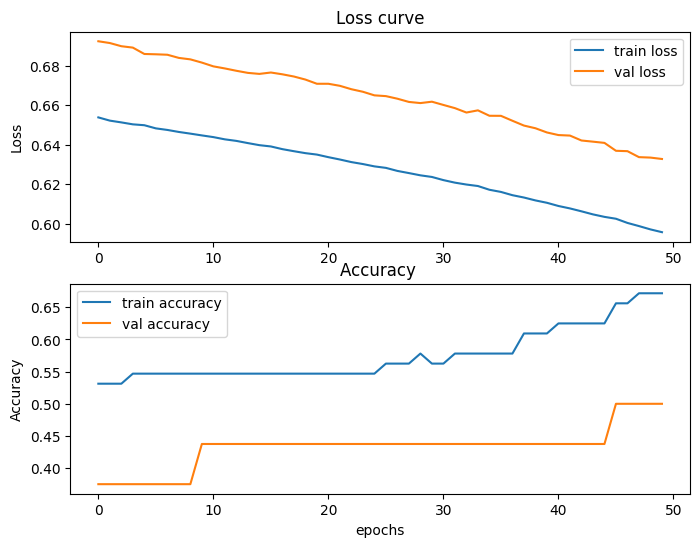

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=16,
        verbose=True)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
#fig.canvas.set_window_title('Learning Iris (binary classification) with Keras')
ax1.plot(history.history['loss'], label = 'train loss')
ax1.plot(history.history['val_loss'], label = 'val loss')    
ax2.plot(history.history['accuracy'], label = 'train accuracy')
ax2.plot(history.history['val_accuracy'], label = 'val accuracy')    
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('epochs')
ax1.set_title('Loss curve')
ax2.set_title('Accuracy ')
ax1.legend()
ax2.legend()
plt.show()

**[Problem 4]** Learn Iris (multi-level classification) with Keras

n features: 4
n classes: 2
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               500       
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
 dense_19 (Dense)            (None, 2)                 22        
                                                                 
Total params: 1,532
Trainable params: 1,532
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


4/4 [==============================] - 1s 59ms/step - loss: 0.7140 - accuracy: 0.2031 - val_loss: 0.7111 - val_accuracy: 0.2500
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.7052 - accuracy: 0.5156 - val_loss: 0.7207 - val_accuracy: 0.3750
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6953 - accuracy: 0.5312 - val_loss: 0.7275 - val_accuracy: 0.3750
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6892 - accuracy: 0.5312 - val_loss: 0.7294 - val_accuracy: 0.3750
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6869 - accuracy: 0.5312 - val_loss: 0.7319 - val_accuracy: 0.3750
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6846 - accuracy: 0.5312 - val_loss: 0.7330 - val_accuracy: 0.3750
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6808 - accuracy: 0.5312 - val_loss: 0.7284 - val_accuracy: 0.3750
Epoch 8/50
4/4 [======================

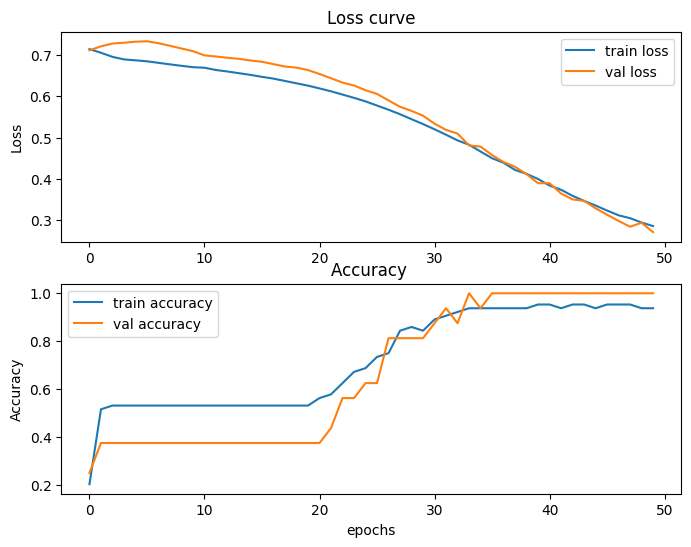

In [ ]:
y = df["Species"].to_numpy()
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].to_numpy()
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y[y == "Iris-setosa"] = 2
#y = y.astype(np.int64)[:, np.newaxis]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = enc.fit_transform(y[:,np.newaxis])

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

n_features = X.shape[1]
n_classes = y.shape[1]

print("n features:", n_features)
print("n classes:", n_classes)


model = Sequential()
model.add(Dense(100, input_dim = n_features, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=16,
        verbose=True)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
ax1.plot(history.history['loss'], label = 'train loss')
ax1.plot(history.history['val_loss'], label = 'val loss')    
ax2.plot(history.history['accuracy'], label = 'train accuracy')
ax2.plot(history.history['val_accuracy'], label = 'val accuracy')    
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('epochs')
ax1.set_title('Loss curve')
ax2.set_title('Accuracy ')
ax1.legend()
ax2.legend()
plt.show()

**[Problem 5]** Learning House Prices with Keras

Xshape: (1460, 2)
yshape: (1460, 1)
Xshape: (1460, 2)
yshape: (1460, 1)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                30        
                                                                 
 dense_21 (Dense)            (None, 30)                330       
                                                                 
 dense_22 (Dense)            (None, 40)                1240      
                                                                 
 dense_23 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
30/30 [==============================] - 3s 64ms/step - loss: 130.2802 - mean_squared_error: 130

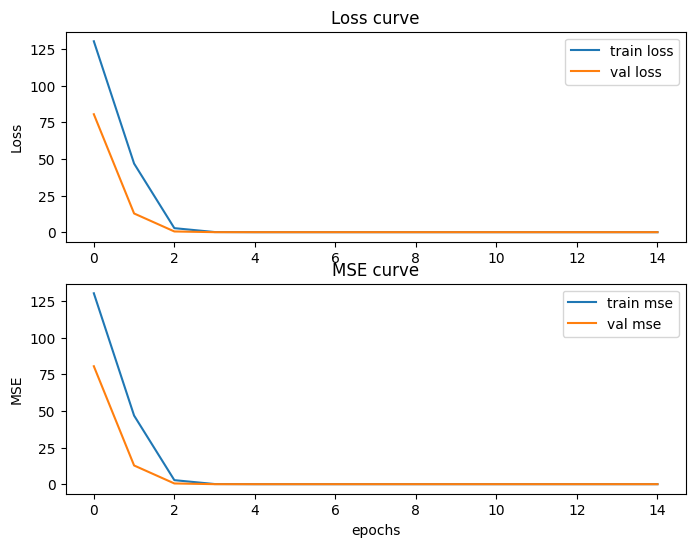

In [ ]:
house_data = pd.read_csv('train.csv')

X = house_data[['GrLivArea', 'YearBuilt']].to_numpy()
y = house_data[['SalePrice']].to_numpy()
print("Xshape:", X.shape)
print("yshape:", y.shape)
X = np.log1p(X)
y = np.log1p(y)

print("Xshape:", X.shape)
print("yshape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=123, test_size=0.2)

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mse])

print(model.summary())

history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=15, batch_size=32)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test mse:', score[1])



fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
ax1.plot(history.history['loss'], label = 'train loss')
ax1.plot(history.history['val_loss'], label = 'val loss')    
ax2.plot(history.history['mean_squared_error'], label = 'train mse')
ax2.plot(history.history['val_mean_squared_error'], label = 'val mse')    
ax1.set_ylabel('Loss')
ax2.set_ylabel('MSE')
ax2.set_xlabel('epochs')
ax1.set_title('Loss curve')
ax2.set_title('MSE curve')
ax1.legend()
ax2.legend()
plt.show()

**[Problem 6]** Learning MNIST with Keras

<ipython-input-23-805c5c9093e2>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = X_train.astype(np.float)
<ipython-input-23-805c5c9093e2>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = X_test.astype(np.float)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was ren

Epoch 1/20
1500/1500 [==============================] - 80s 52ms/step - loss: 0.5282 - accuracy: 0.8592 - val_loss: 0.2650 - val_accuracy: 0.9190
Epoch 2/20
1500/1500 [==============================] - 76s 51ms/step - loss: 0.2387 - accuracy: 0.9294 - val_loss: 0.2069 - val_accuracy: 0.9338
Epoch 3/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.1843 - accuracy: 0.9460 - val_loss: 0.1558 - val_accuracy: 0.9547
Epoch 4/20
1500/1500 [==============================] - 76s 51ms/step - loss: 0.1522 - accuracy: 0.9559 - val_loss: 0.1352 - val_accuracy: 0.9592
Epoch 5/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.1313 - accuracy: 0.9606 - val_loss: 0.1169 - val_accuracy: 0.9661
Epoch 6/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1144 - accuracy: 0.9668 - val_loss: 0.1097 - val_accuracy: 0.9656
Epoch 7/20
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1019 - accuracy: 0.9696 - val_loss: 0.0977 -

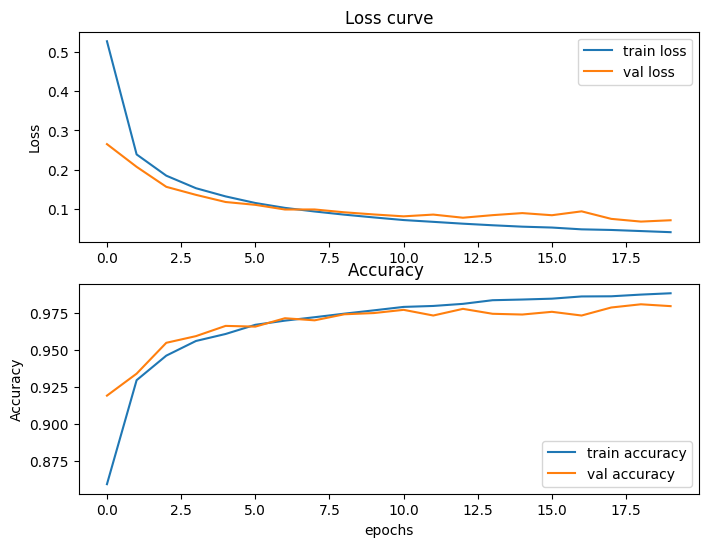

In [ ]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

#X_train = X_train.reshape(-1,784)
#X_test = X_test.reshape(-1,784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:,np.newaxis])
y_test_one_hot = enc.fit_transform(y_test[:,np.newaxis])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=0)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=32,
        verbose=True)

score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test acc:', score[1])

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
ax1.plot(history.history['loss'], label = 'train loss')
ax1.plot(history.history['val_loss'], label = 'val loss')    
ax2.plot(history.history['accuracy'], label = 'train accuracy')
ax2.plot(history.history['val_accuracy'], label = 'val accuracy')    
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('epochs')
ax1.set_title('Loss curve')
ax2.set_title('Accuracy ')
ax1.legend()
ax2.legend()
plt.show()